In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('data/train.csv')
print("Length of data:", len(data))

Length of data: 230130


In [3]:
data.head()

id        date country              store             product  num_sold
0   0  2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1   1  2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2   2  2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3   3  2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4   4  2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [5]:
data.describe()


id            int64
date         object
country      object
store        object
product      object
num_sold    float64
dtype: object

In [7]:
print("Null values:")
print(data.isnull().sum())
print("Duplicated values:")
print(data.duplicated().sum())
print("Unique values:")
print(data.nunique())
print("Columns:")
print(data.columns)
print("Shape:")
print(data.shape)
print("Data types:")
print(data.dtypes)


Null values:
id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64
Duplicated values:
0
Unique values:
id          230130
date          2557
country          6
store            3
product          5
num_sold      4037
dtype: int64
Columns:
Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')
Shape:
(230130, 6)
Data types:
id            int64
date         object
country      object
store        object
product      object
num_sold    float64
dtype: object


Check if the distrinbution of the missing value in the data is random or not

In [17]:
# First, we need to prepare the data for t-SNE
# Convert date to numerical format and handle categorical variables
data_for_tsne = data.copy()
le = LabelEncoder()
data_for_tsne['date'] = le.fit_transform(data_for_tsne['date'])

# Convert categorical variables using label encoding
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['country', 'store', 'product']
for col in categorical_columns:
    le = LabelEncoder()
    data_for_tsne[col] = le.fit_transform(data_for_tsne[col])

data_for_tsne.drop(["num_sold", "id"], axis=1, inplace=True)


In [18]:
data_for_tsne

date  country  store  product
0          0        0      0        0
1          0        0      0        1
2          0        0      0        2
3          0        0      0        3
4          0        0      0        4
...      ...      ...    ...      ...
230125  2556        5      1        0
230126  2556        5      1        1
230127  2556        5      1        2
230128  2556        5      1        3
230129  2556        5      1        4

[230130 rows x 4 columns]

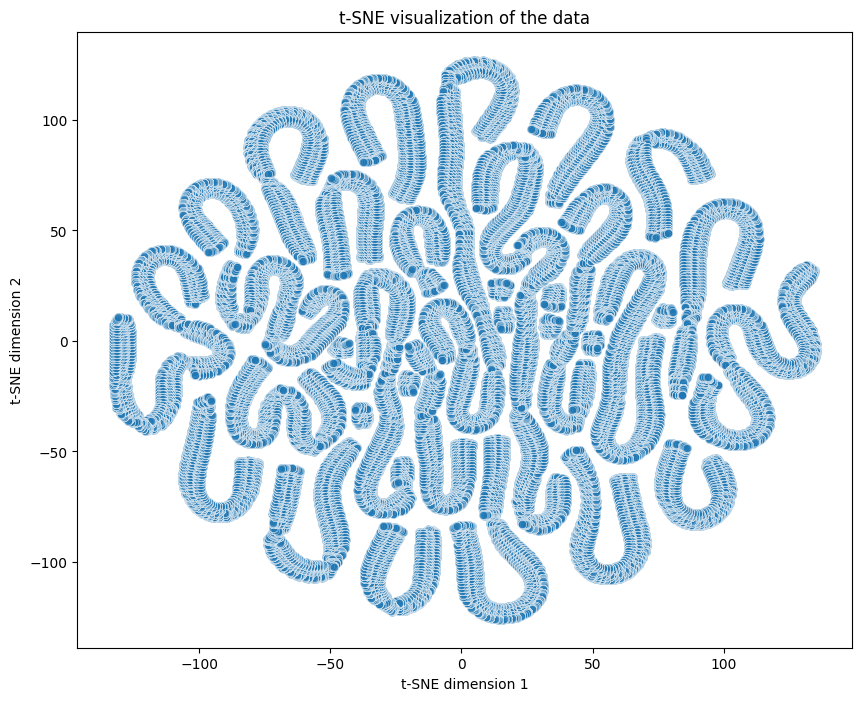

In [19]:
# Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_for_tsne)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])


# Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='tsne1', y='tsne2', alpha=0.5)
plt.title('t-SNE visualization of the data')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()

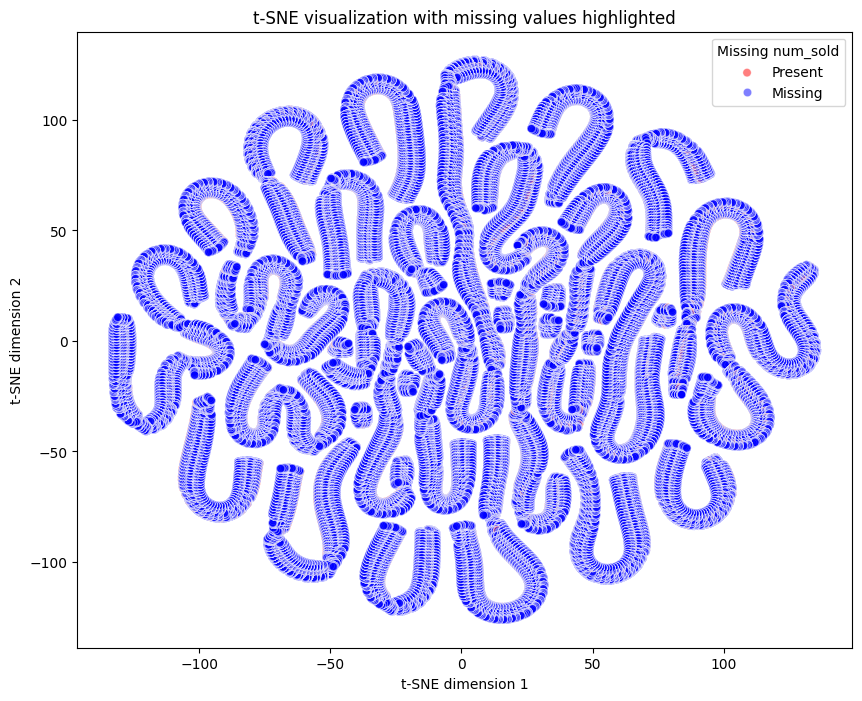

In [20]:
# Create a mask for missing values in num_sold
missing_mask = data['num_sold'].isna()

# Plot t-SNE results with colors indicating missing values
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=tsne_df,
    x='tsne1',
    y='tsne2',
    hue=missing_mask,
    palette=['blue', 'red'],
    alpha=0.5
)
plt.title('t-SNE visualization with missing values highlighted')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.legend(title='Missing num_sold', labels=['Present', 'Missing'])
plt.show()


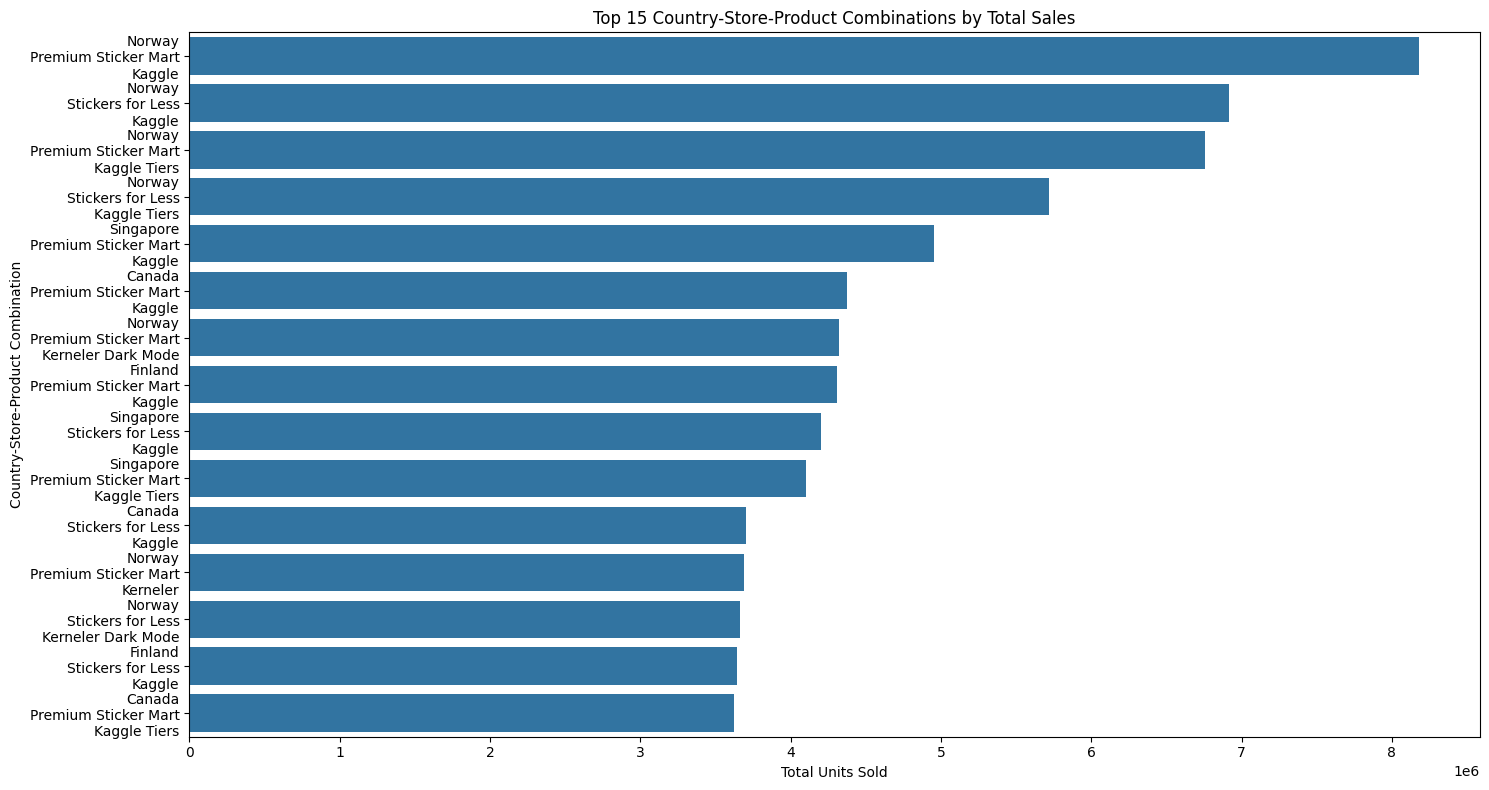

In [24]:
# Group by country, store, and product, and calculate total sales
sales_by_group = data.groupby(['country', 'store', 'product'])['num_sold'].sum().reset_index()

# Sort by total sales in descending order and get top 15
top_sales = sales_by_group.sort_values('num_sold', ascending=False).head(15)

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=top_sales, 
            y=top_sales.apply(lambda x: f"{x['country']}\n{x['store']}\n{x['product']}", axis=1),
            x='num_sold')

plt.title('Top 15 Country-Store-Product Combinations by Total Sales')
plt.xlabel('Total Units Sold')
plt.ylabel('Country-Store-Product Combination')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()


In [22]:
# Print unique values for categorical columns
print("Unique values in 'country':")
print(data['country'].unique())
print("\nUnique values in 'store':")
print(data['store'].unique())
print("\nUnique values in 'product':")
print(data['product'].unique())


Unique values in 'country':
['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']

Unique values in 'store':
['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']

Unique values in 'product':
['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']


In [26]:
# Convert 'date' column to datetime if it's not already
data['date'] = pd.to_datetime(data['date'])

# Extract date components
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['yr'] = data['date'].dt.year


In [27]:
data

id       date    country                 store  \
0            0 2010-01-01     Canada     Discount Stickers   
1            1 2010-01-01     Canada     Discount Stickers   
2            2 2010-01-01     Canada     Discount Stickers   
3            3 2010-01-01     Canada     Discount Stickers   
4            4 2010-01-01     Canada     Discount Stickers   
...        ...        ...        ...                   ...   
230125  230125 2016-12-31  Singapore  Premium Sticker Mart   
230126  230126 2016-12-31  Singapore  Premium Sticker Mart   
230127  230127 2016-12-31  Singapore  Premium Sticker Mart   
230128  230128 2016-12-31  Singapore  Premium Sticker Mart   
230129  230129 2016-12-31  Singapore  Premium Sticker Mart   

                   product  num_sold  day  month    yr  
0        Holographic Goose       NaN    1      1  2010  
1                   Kaggle     973.0    1      1  2010  
2             Kaggle Tiers     906.0    1      1  2010  
3                 Kerneler     423.0    1      1  2010  
4       Kerneler Dark Mode     491.0    1      1  2010  
...                    ...       ...  ...    ...   ...  
230125   Holographic Goose     466.0   31     12  2016  
230126              Kaggle    2907.0   31     12  2016  
230127        Kaggle Tiers    2299.0   31     12  2016  
230128            Kerneler    1242.0   31     12  2016  
230129  Kerneler Dark Mode    1622.0   31     12  2016  

[230130 rows x 9 columns]

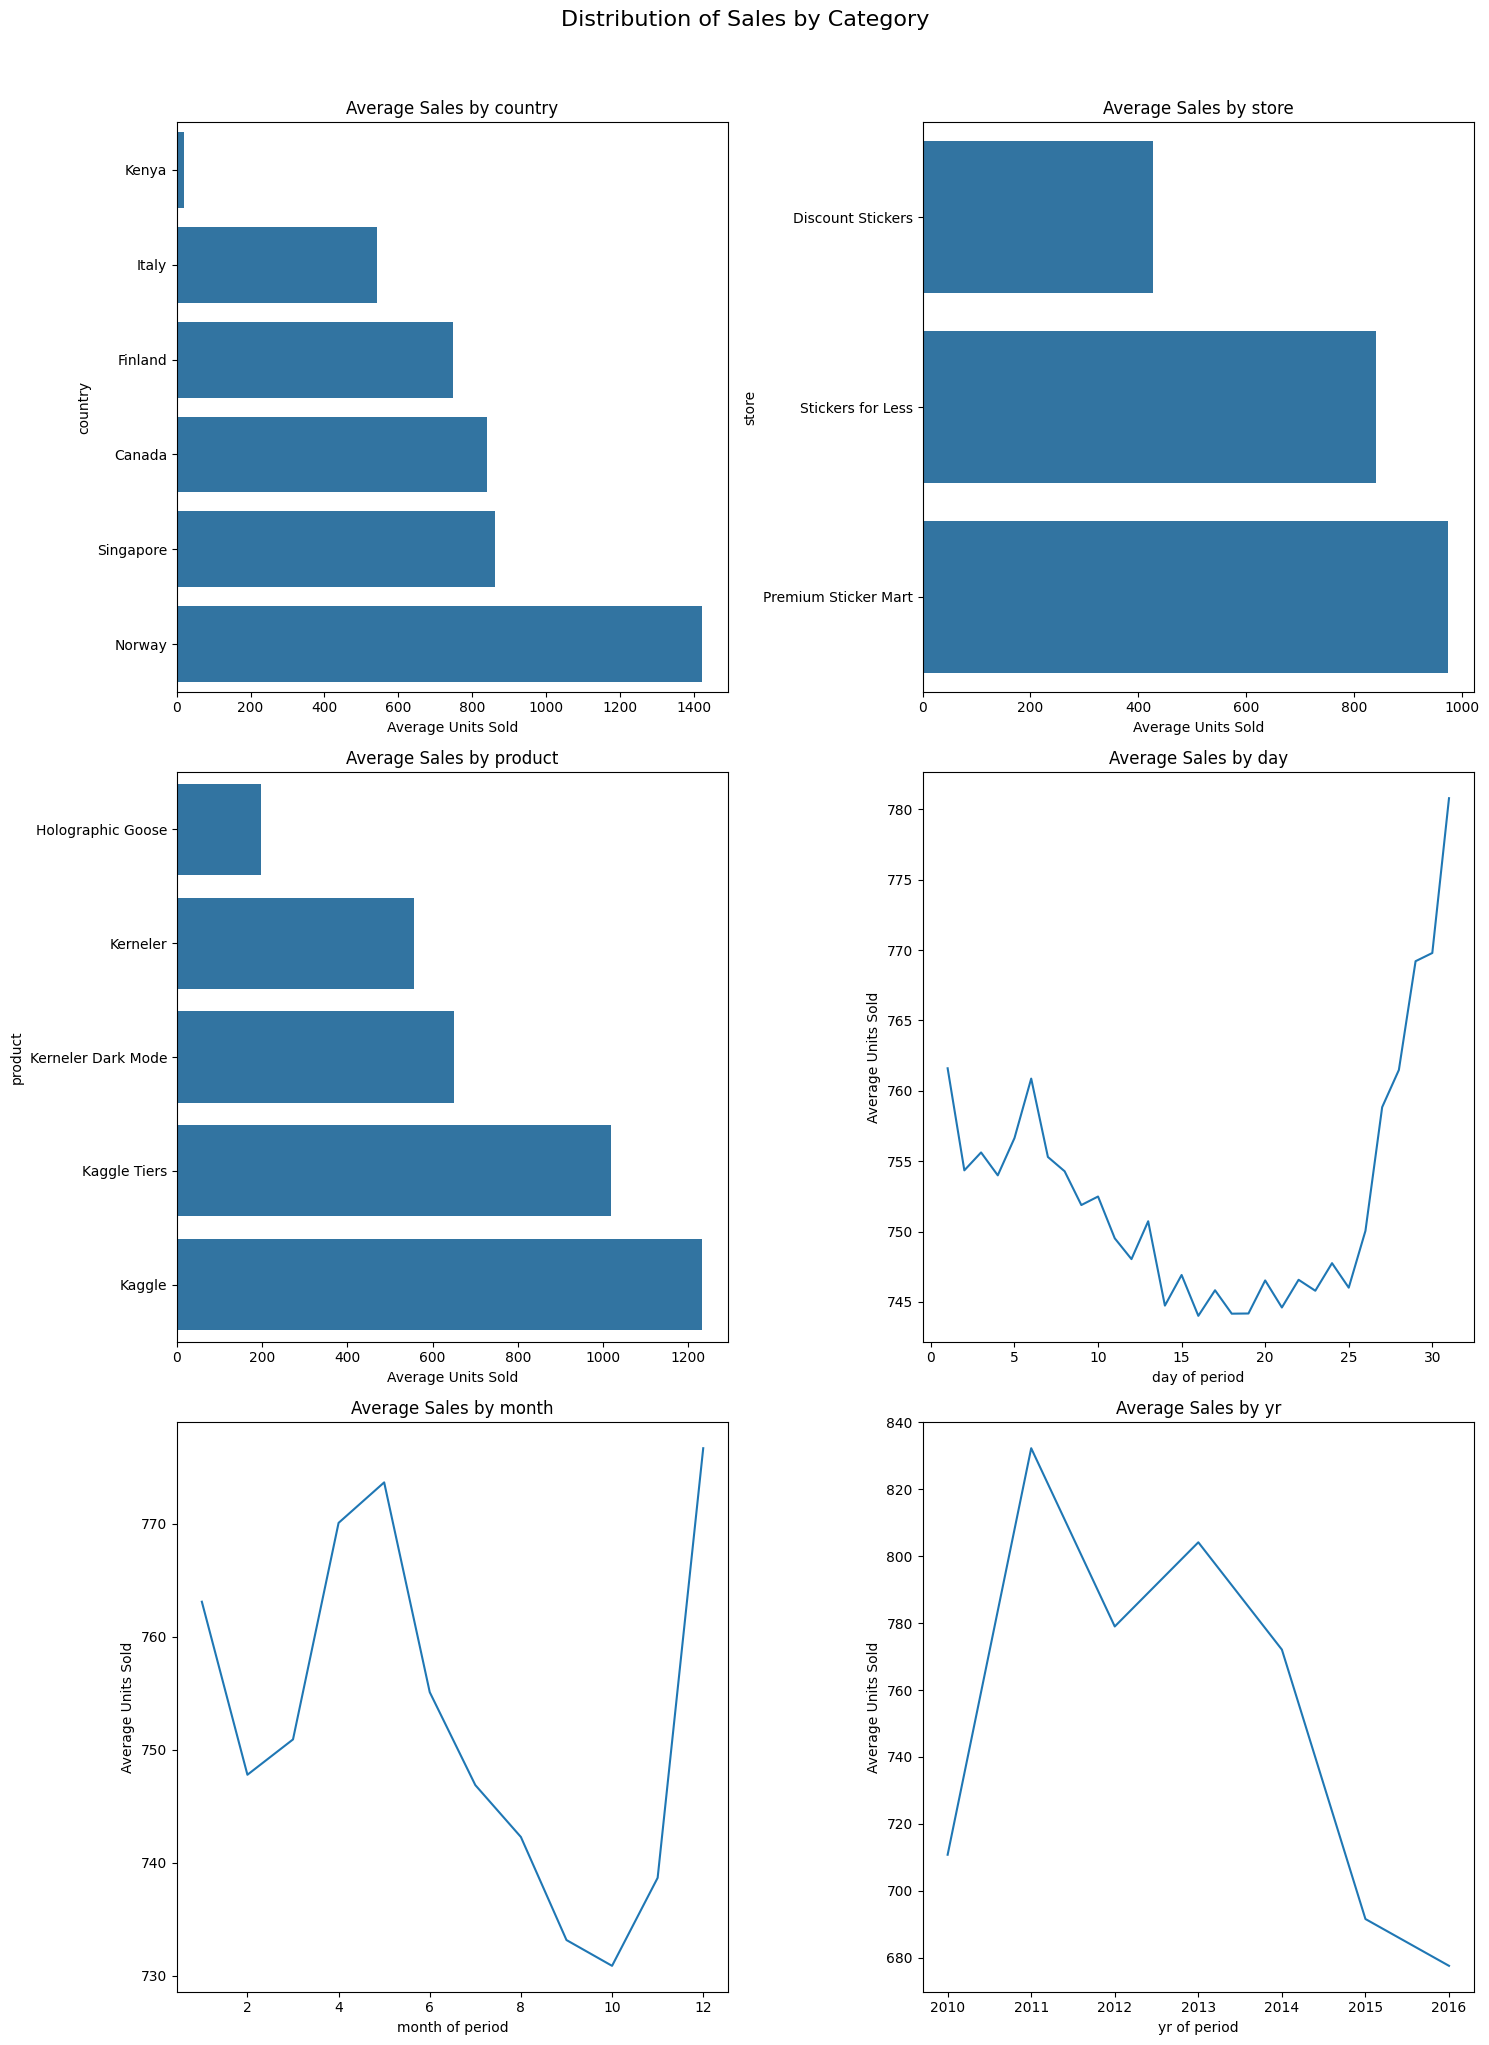

In [31]:
# Create a figure with subplots for each categorical column
fig, axes = plt.subplots(3, 2, figsize=(15, 20))  # Changed to 3x2 grid
fig.suptitle('Distribution of Sales by Category', fontsize=16, y=1.02)

# Columns to analyze
cols = ['country', 'store', 'product', 'day', 'month', 'yr']

# Plot bar chart for each column
for i, col in enumerate(cols):
    # Calculate mean sales for each category
    if col in ['day', 'month', 'yr']:
        # For time-based columns, show average sales per time unit
        cat_sales = data.groupby(col)['num_sold'].mean().sort_index()
    else:
        cat_sales = data.groupby(col)['num_sold'].mean().sort_values(ascending=True)
    
    # Create bar plot
    row = i // 2  # Calculate row index
    col_idx = i % 2  # Calculate column index
    
    if col in ['day', 'month', 'yr']:
        # Line plot for time-based columns to show trends
        sns.lineplot(x=cat_sales.index, y=cat_sales.values, ax=axes[row, col_idx])
        axes[row, col_idx].set_xlabel(f'{col} of period')
    else:
        sns.barplot(x=cat_sales.values, y=cat_sales.index, ax=axes[row, col_idx])
        axes[row, col_idx].set_xlabel('Average Units Sold')
    
    # Customize subplot
    axes[row, col_idx].set_title(f'Average Sales by {col}')
    axes[row, col_idx].set_ylabel('Average Units Sold' if col in ['day', 'month', 'yr'] else col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

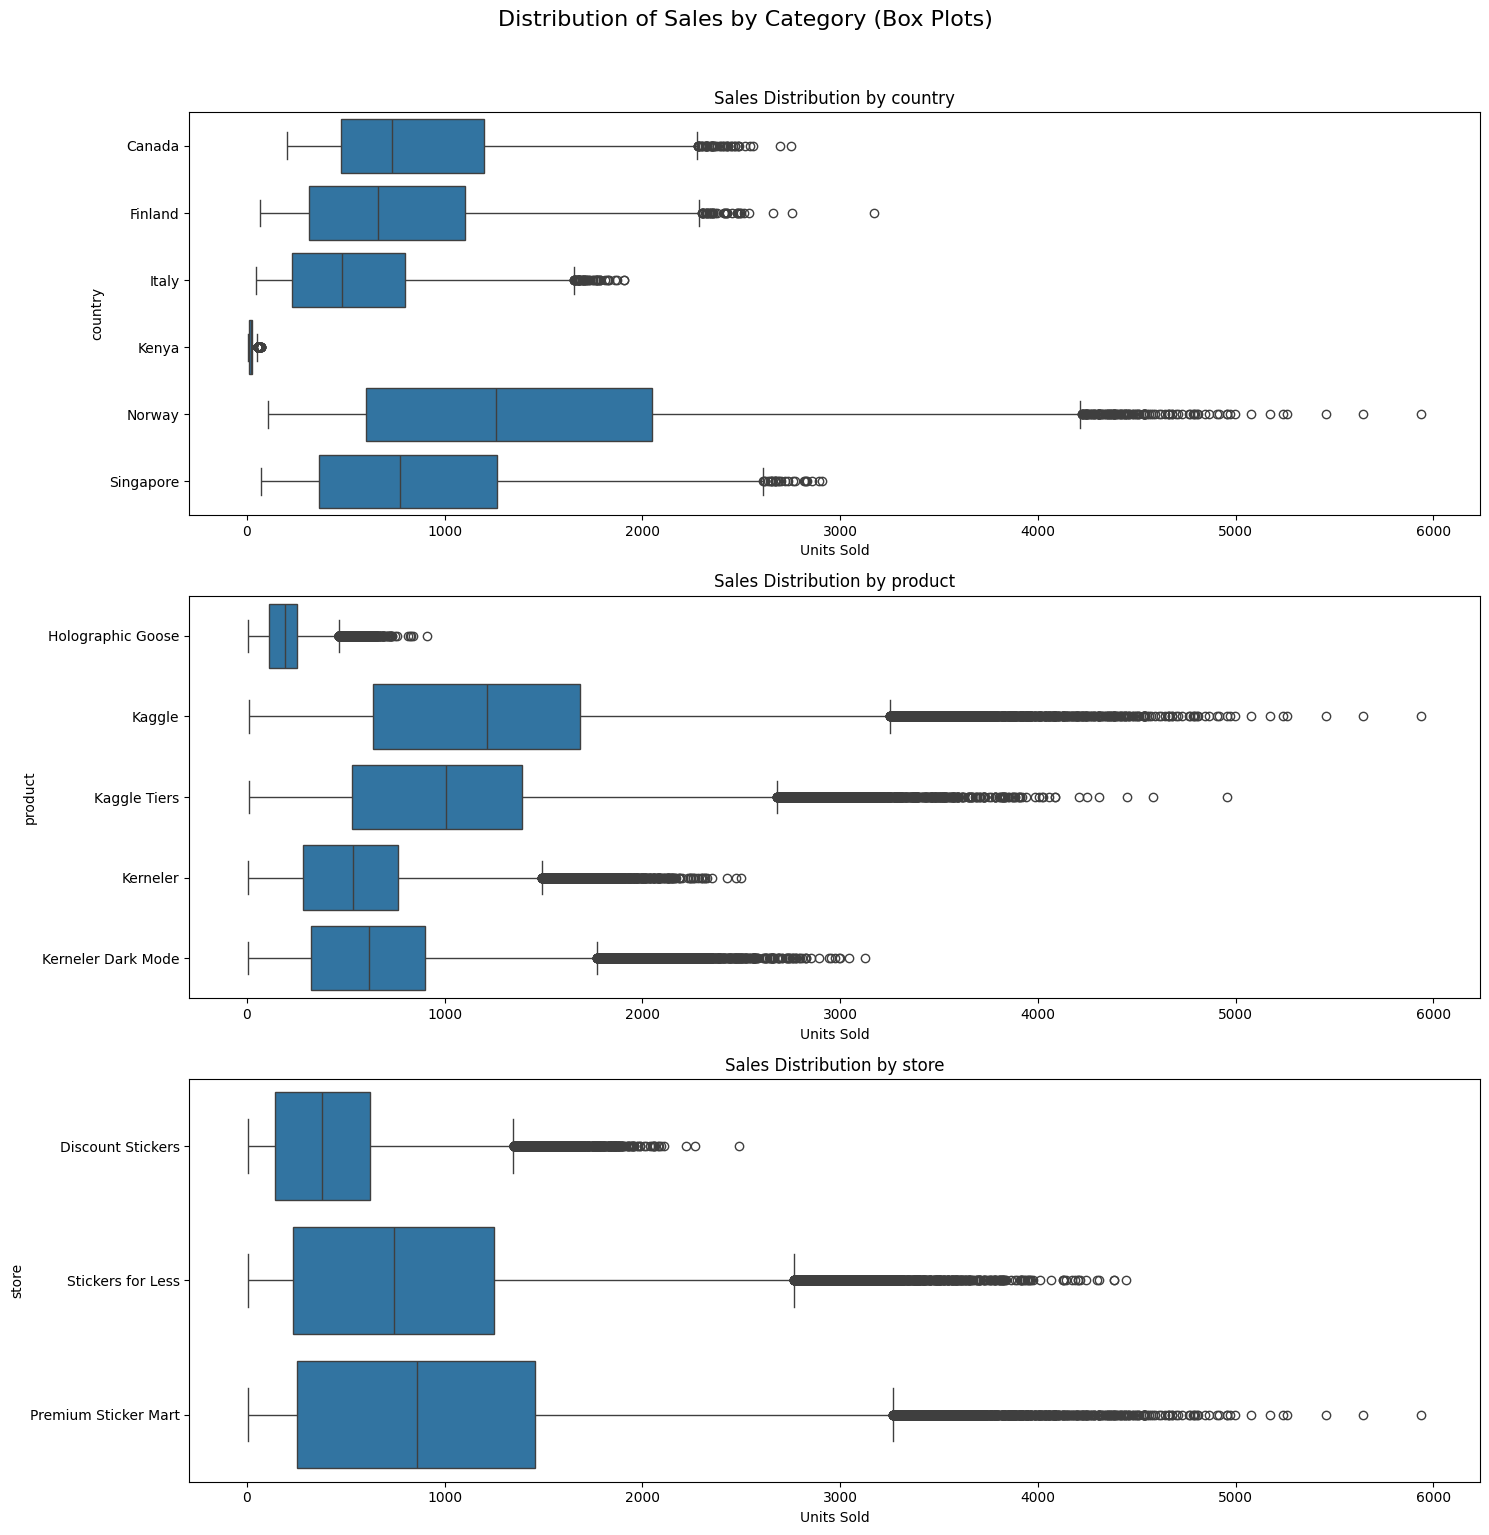

In [34]:
# Create a figure with subplots for categorical columns
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Distribution of Sales by Category (Box Plots)', fontsize=16, y=1.02)

# Columns to analyze 
cols = ['country', 'product', 'store']

# Plot box plot for each column
for i, col in enumerate(cols):
    sns.boxplot(data=data, y=col, x='num_sold', ax=axes[i])
    axes[i].set_title(f'Sales Distribution by {col}')
    axes[i].set_xlabel('Units Sold')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

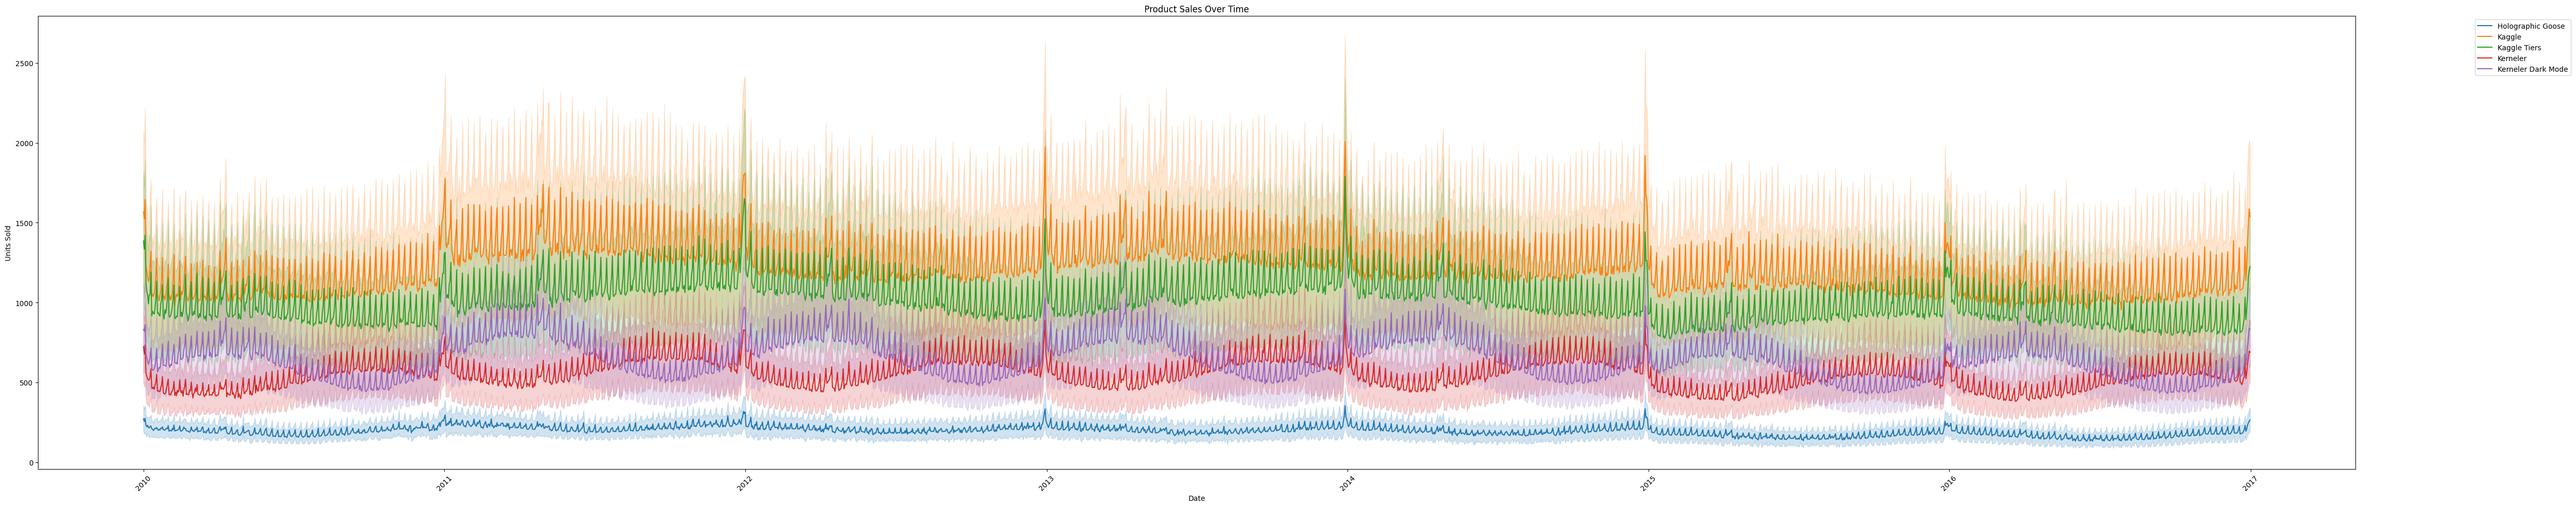

In [37]:
# Create a figure for product sales over time
plt.figure(figsize=(50, 10))

# Plot line for each product
for product in data['product'].unique():
    product_data = data[data['product'] == product]
    sns.lineplot(data=product_data, x='date', y='num_sold', label=product)

plt.title('Product Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


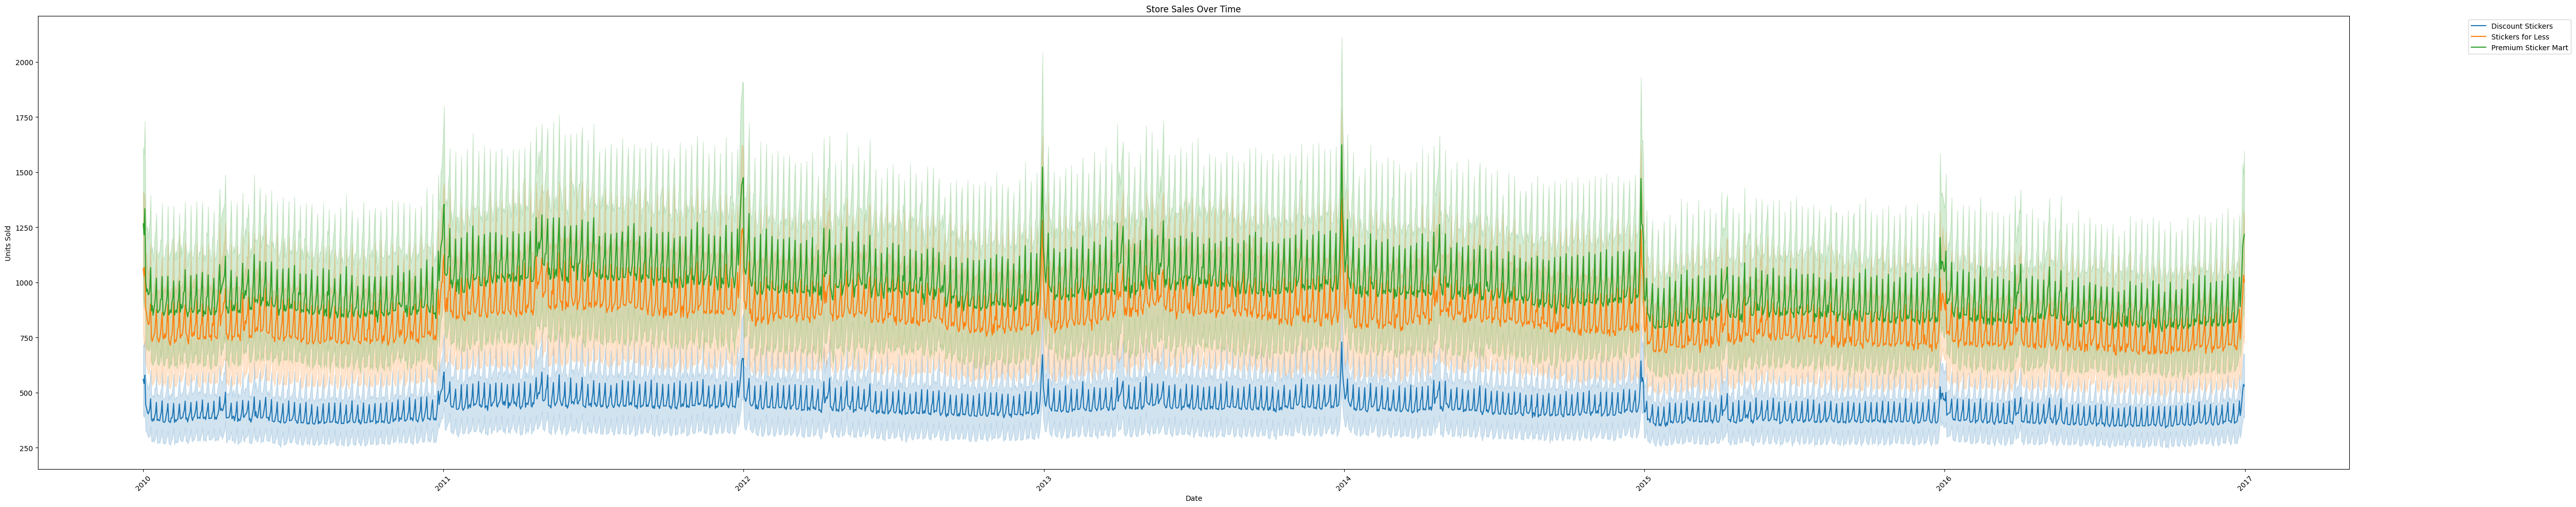

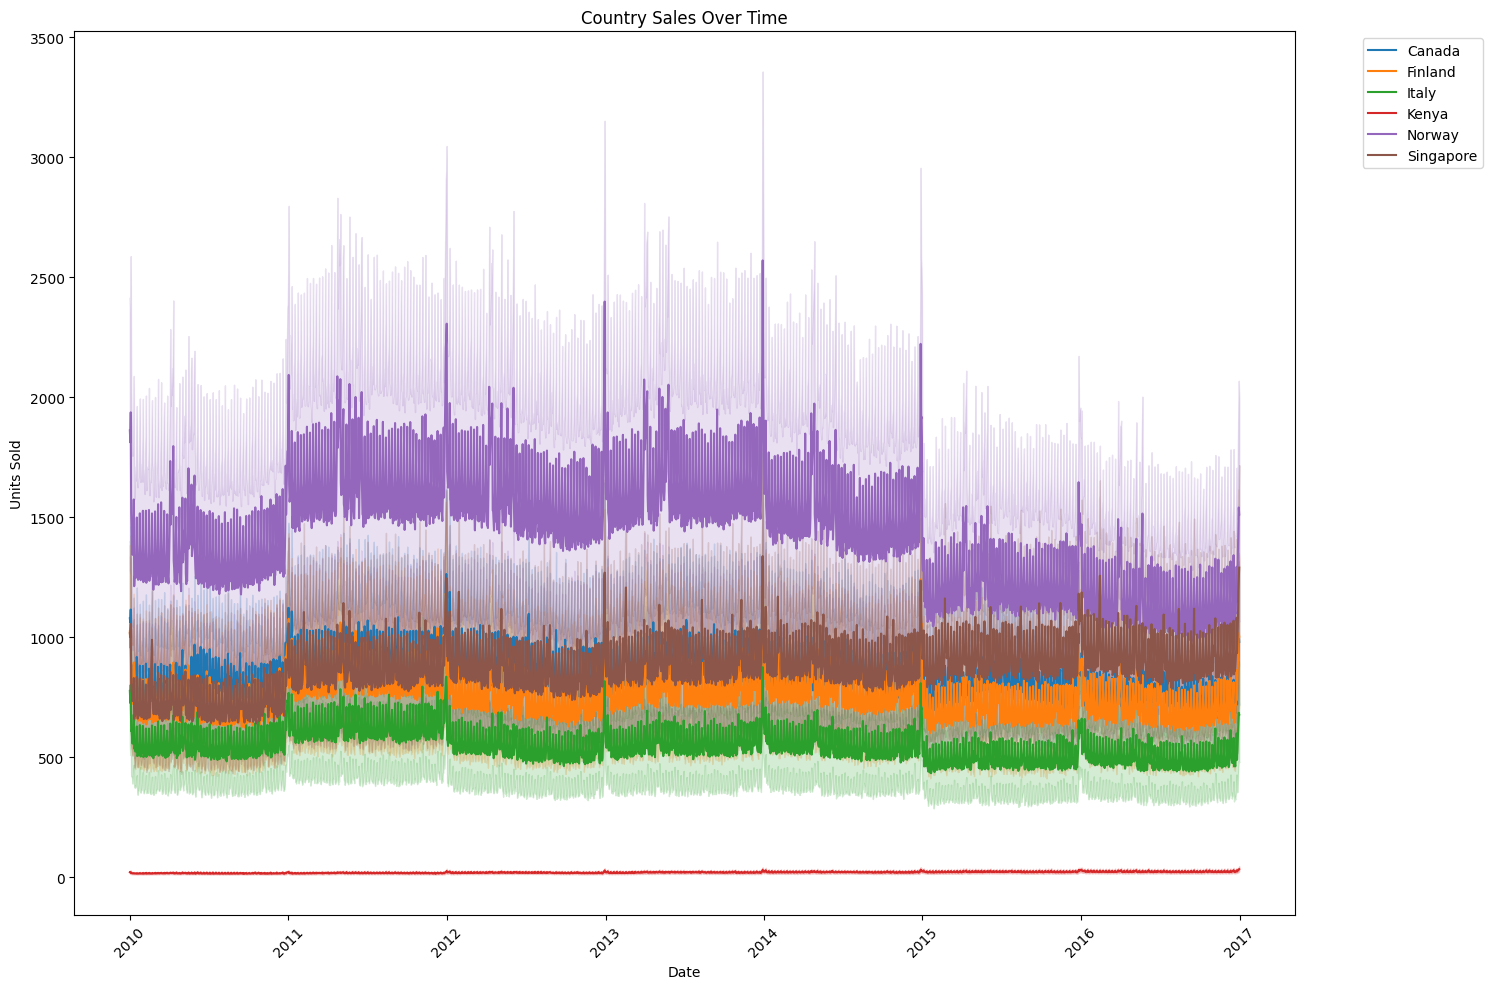

In [38]:
# Create a figure for store sales over time
plt.figure(figsize=(50, 10))

# Plot line for each store
for store in data['store'].unique():
    store_data = data[data['store'] == store]
    sns.lineplot(data=store_data, x='date', y='num_sold', label=store)

plt.title('Store Sales Over Time') 
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create a figure for country sales over time
plt.figure(figsize=(15, 10))

# Plot line for each country
for country in data['country'].unique():
    country_data = data[data['country'] == country]
    sns.lineplot(data=country_data, x='date', y='num_sold', label=country)

plt.title('Country Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold') 
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
